# Recipe

1. Understand the dataframe - print the dataframe, look at unique values, etc.
2. Plot each variable - histograms, scatterplots. We have to find each distribution.
3. Analyze each of these graphics to obtain trends, or conclusions. 
4. We shoudl decide what variable to use in the model. 
   Approachs to this: if some variables are dependent, just take one of those variables.
   We can start using one variable, and the take another variable etc.
5. We start with one variable and fit the model. Then we study the statistics.
   We should start considering overfitting. 
   
   p-values: we evaluate the coefficient with p-values, that is, we can calculate a
   certain test hypothesis, the coefficient equals to something, for each of these 
   coefficients, then we get a p-value. We want the p-value to be less than 0.05 for
   the hypothesis to be significant (P( test statistic being on the tales|given hypothesis) = p-value
   we use and observed value t, P(T >t | H), if for instance H tell us that the mean is 0 and T is randomly
   distributed we can calculate the p-value)
   
6. We continue adding variables controlling the AIC
7. We can use feature engineering to improve our fitting
8. We can make predictions

Extras:

* Sometimes we have to transform categorical values into dummy variables using hot encoding
* We can also apply k-fold validation to our data set - this is in the last section of this
  notebook. We have to shuffle our data set.


# Model overfitting


Suppose we have two variables $X$,$Y$ and $Y$ is a function of $X$. Suppose that $Y$ deviates from the line $Y = \beta x_1 +\beta_0$ but not too much. In this case, regression is a good approximation.

Now suppose our model has a lot of noise. Then we say the model is saturated. The approximation is not a line, but a piecewise function and has zero error. This is not capturing the trend.

![title](overfitting.png)

Overfitting is represented by the zig-zag around the line. 

# AIC and BIC

The likelihood function increase when you increse the number of variables. We have the saturated model with a lot of parameters and the likelihood function of any other model with less variables. We want to have a small number of parameters $k$ in our model. The AIC is defined as 

$$AIC = 2k-2l$$

where $l$ represents the maximum of the log-likelihood function. AIC means Akaike information criterion.

![title](overfitting2.png)

After some point the likelihood function stops increasing and the quantity k dominates the difference. We have a minimum, and that's the point where we want to be. If we cross this point we are overfitting.


We also have the BIC, which means Bayesian information criterion. The BIC is defined as 

$$BIC = k\log(n)-2l$$

where $n$ is the size of the dataset, $k$ is the number of parameters in our model and $l$ is maximum of the log-likelihood function. To minimize the BIC we need a small $k$.

![title](BIC.png)


We can use these two quantities to preven overfitting.

# Cross validation

You have a training data set. We know that when $k$, the number of parameters increase, the likelihood becomes better and better. At some point you start fitting noise. If we have a validation dataset, we can realize if we are fitting noise. If the error and likelihood functio is similar for both datasets, we are not overfitting.

Suppose we are modeling stock market, 10 years data, we apply the model to 11th year and we find that the model, the result from 11th year, has larger error than our previous error, with the training data, we won't make any money with this model.

In reality we split our 10 year dataset, in general we don't have a validation dataset. We break the dataset randomly into pieces. If we are applying regression, we can divide in 2/3 for training and 1/3 for validation.
This is not a general rule. A more common aplication is the following. We divide our dataset into pieces (randomly) and then we pick sets from these set of pieces to train the model. 

We can take 1 and 2 for training and 3 for validation, 1 and 3 for training and 2 for validation, 2 and 3 for training and 1 for validation. We rotate the validation and training sets.

Then we add the error of each of these applications. $\epsilon = \epsilon_1 +\epsilon_2 +\epsilon_3$, where $\epsilon_i$ refers to the $i$-th iteration. In this case we have 3 iterations.

<div>
<img src="crossvalidation.png" width="500"/>
</div>


# One-hot encoding

Real world datasets are not necessarily numeric (we also have categorical variables). Suppose our data set is the result of a survey

<div>
<img src="non-numeric.png" width="200"/>
</div>

One method to enconde these variables as numerical variables is called one-hot enconding. If we have a yes, no variable we encode using 0 and 1. If we have 3 answer, yes, no, unknown, then we encode positive yes with 1, positive No with 1 and positive unknown with 1. These variables are not independent because having two columns we know the third one. 

<div>
<img src="one-hot.png" width="400"/>
</div>

We just count positive answers in each category. This is a sparse data matrix. Another way of coding an 'ordered' categorical value as poor, fair, good, very good, excelent is asigning a number to each category preserving the categorical order, in this case 1,2,3,4,5.  

# Feature engineer 

We always assume $y = f(x \cdot \beta)$, where $x,\beta$ are arrays. In general we apply a linear model 
$y \sim \sum_{i=1}^{n}x_i \beta_i$, but this does not work for non linear datasets.

In general if we have a data set $X$ we can apply a transformation to this set. For instance if our data follows a cuadratic model $y \sim x^2$, then we can apply the transformation $g(x) = x^2$ to the data set. 

This transformation is called feature engineer. Instead of using the predictors, we use the transformed predictors.
Then we apply the regression model to this transformed data set.



# Implementing model: data wrangling and visualization.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import csv
import zipfile


In [4]:
# loading a typical dataset (used in the ds community)


df = pd.read_csv("bikedc.csv")
df

# Some of the variables are categorical and are transformed into binary variables.
# For instance, weather is a categorical variable 

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,12,365,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,12,365,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,12,365,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38


In [5]:
# variable list

df.columns

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
# Data wrangling and visualization

print(df.head())

   season  mnth  day  hr  holiday  weekday  workingday  weathersit  temp  \
0       1     1    1   0        0        6           0           1  0.24   
1       1     1    1   1        0        6           0           1  0.22   
2       1     1    1   2        0        6           0           1  0.22   
3       1     1    1   3        0        6           0           1  0.24   
4       1     1    1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


In [7]:
print(df.describe())

            season         mnth         day           hr      holiday  \
count  8645.000000  8645.000000  8645.00000  8645.000000  8645.000000   
mean      2.513592     6.573973   184.39572    11.573626     0.027646   
std       1.105477     3.428147   104.82334     6.907822     0.163966   
min       1.000000     1.000000     1.00000     0.000000     0.000000   
25%       2.000000     4.000000    94.00000     6.000000     0.000000   
50%       3.000000     7.000000   185.00000    12.000000     0.000000   
75%       3.000000    10.000000   275.00000    18.000000     0.000000   
max       4.000000    12.000000   365.00000    23.000000     1.000000   

           weekday   workingday   weathersit         temp       atemp  \
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.00000   
mean      3.012724     0.683748     1.437594     0.489069     0.46900   
std       2.006370     0.465040     0.653859     0.197943     0.17676   
min       0.000000     0.000000     1.000000     0

In [8]:
np.unique(df['cnt'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

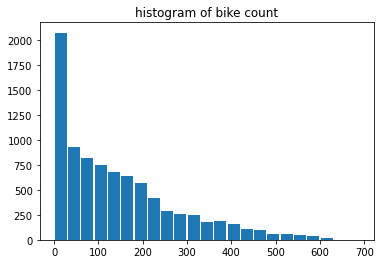

In [9]:
# Histogram 

binblock = np.arange(0,700,30) # from 0 to 700 - range jumps of 30. 
plt.hist(df['cnt'],bins = binblock, rwidth = 0.9)
plt.title("histogram of bike count")
plt.show()

This looks like a Poisson distribution, we are representing usage of bikes per hour.

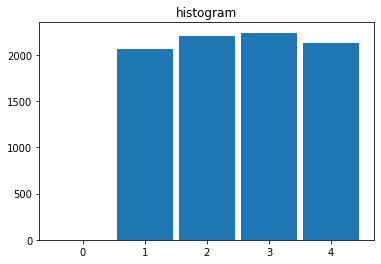

In [10]:
binblock = np.arange(-0.5,5,1)
plt.hist(df['season'], bins = binblock, rwidth = 0.9)
plt.title('histogram')
plt.show()

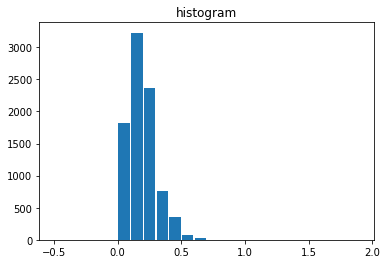

In [11]:
binblock = np.arange(-0.5,2,0.1)
plt.hist(df['windspeed'], bins = binblock, rwidth = 0.9)
plt.title('histogram')
plt.show()


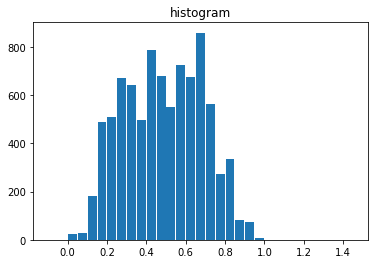

In [12]:
binblock = np.arange(-0.1,1.5,0.05)
plt.hist(df['temp'], bins = binblock, rwidth = 0.9)
plt.title('histogram')
plt.show()

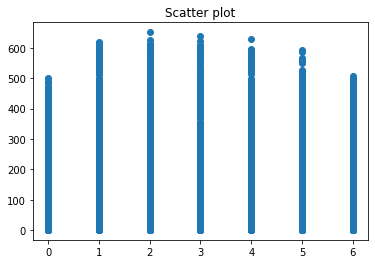

In [13]:
# Scatter Plots and Data Agregation

# Predictor: weekday.

plt.scatter(df['weekday'], df['cnt'])
plt.title('Scatter plot')
plt.show()

In [14]:
# we recover weekday and cnt grouped by weekday and the we calculate the mean of cnt. 
# This is a column having each weak day and the mean for each day. 

df_weekday = df[['cnt','weekday']].groupby('weekday').mean().reset_index() 
df_weekday

,weekday,cnt
0,0,143.845654
1,1,145.927935
2,2,147.576105
3,3,137.647681
4,4,142.491429
5,5,146.897498
6,6,142.201741


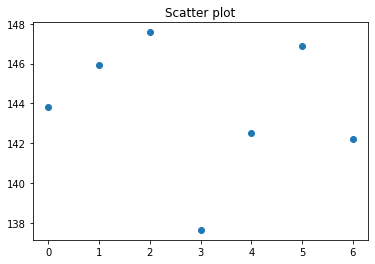

In [15]:
plt.scatter(df_weekday['weekday'], df_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

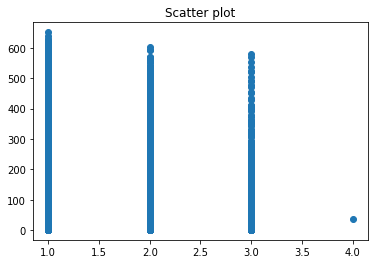

In [16]:
# Predictor: weathersit

plt.scatter(df['weathersit'], df['cnt'])
plt.title('Scatter plot')
plt.show()

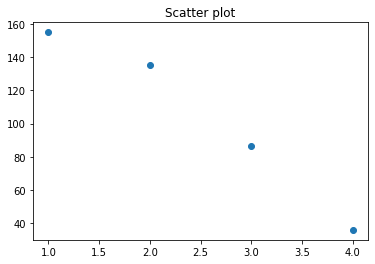

In [17]:
df_weekday = df[['cnt','weathersit']].groupby('weathersit').mean().reset_index() 
plt.scatter(df_weekday['weathersit'], df_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

# weathersit:

# 1: clear, few clouds, partly cloud, partly cloudy
# 2: mist+cloudy, mist+broken clouds
# 3: Light snow, light rain + Thunderstorm
# 4: Heavy rain + Ice pallets + Thunderstorm + Mist,Snow + Fog

# The first point means a clear day
# and so on until a Heavy Rain  + ...

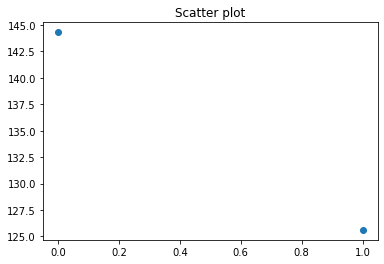

In [18]:
# Predictor: holidays

df_weekday = df[['cnt','holiday']].groupby('holiday').mean().reset_index() 
plt.scatter(df_weekday['holiday'], df_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

# meaning -> holiday less bike usage than in a normal day

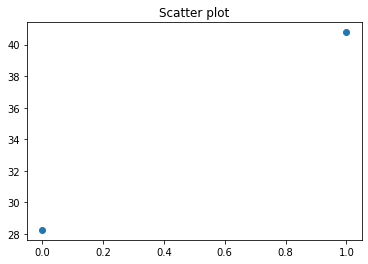

In [19]:
df_weekday = df[['casual','holiday']].groupby('holiday').mean().reset_index() 
plt.scatter(df_weekday['holiday'], df_weekday['casual'])
plt.title('Scatter plot')
plt.show()

# casual usage against holyday. 

# This tell us that the number of casual usage against a holiday
# Then casual usage, in genera, happens on holidays.

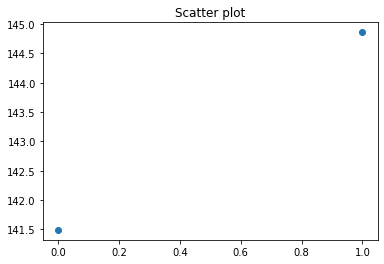

In [20]:
# Predictor: workingday

df_weekday = df[['cnt','workingday']].groupby('workingday').mean().reset_index() 
plt.scatter(df_weekday['workingday'], df_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

# We have that the usage increase on working days.

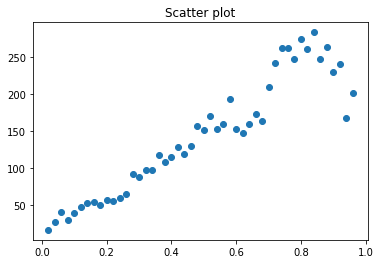

In [21]:
# Predictor: temperature

df_weekday = df[['cnt','temp']].groupby('temp').mean().reset_index() 
plt.scatter(df_weekday['temp'], df_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

# This graphic represents use against temperature.
# The use of bikes increase when the temperature increase
# If the temperature is too hot, then the use of bikes decrease a little

# Implement model: variable selection and model prediction.


## Modeling


In [22]:
# Starting simple: what should be the predictors?

# All the variables cannot be used as predictors. There are some variables which are dependent or almost the same
# We start with one variable.


X = df[['season']]
y = df['cnt']
X = sm.add_constant(X) # adding constant column with ones (to get beta_0)
bike_model = sm.GLM(y,X, family = sm.families.Poisson()).fit()
print(bike_model.summary())

# the p-value is almost zero

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8643
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.2637e+05
Date:                Sat, 24 Oct 2020   Deviance:                   9.9970e+05
Time:                        12:55:21   Pearson chi2:                 1.01e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4723      0.002   1838.809      0.0

In [23]:
# Adding one more variable: what should be the predictors?

X = df[['season','temp']]
y = df['cnt']
X = sm.add_constant(X) # adding constant column with ones (to get beta_0)
bike_model = sm.GLM(y,X, family = sm.families.Poisson()).fit()
print(bike_model.summary())

# the p-value is almost zero

# After adding one variable - conclusions: p-values are almost zero. The log-likelihood increase, which 
# is consistent with the theory. More variables, the model closer to the real values, more probability.



                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8642
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3540e+05
Date:                Sat, 24 Oct 2020   Deviance:                   8.1776e+05
Time:                        12:55:21   Pearson chi2:                 8.03e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5891      0.004   1007.917      0.0

In [24]:
# Adding many variables

var_list = ['mnth','day','hr','holiday','weekday','workingday','weathersit','atemp','hum','windspeed']
selected_var = ['season','temp']
bike_models = []
bike_models_aic = [] # aic increase when we have overfitting 

for i in var_list:
    selected_var.append(i)
    X = df[selected_var]
    y = df['cnt'] # we want to predict cnt - we train the model with this variable
    X = sm.add_constant(X)
    currentmodel = sm.GLM(y,X, family = sm.families.Poisson()).fit()
    bike_models.append(currentmodel)
    bike_models_aic.append(currentmodel.aic) # here we get the model aic

In [25]:
bike_models_aic # aic is decreasing and we are not overfitting

[869635.8906805986,
 869202.2149922834,
 722729.0505928473,
 722415.0444100426,
 722244.5584161625,
 722014.7539584581,
 713938.5526483222,
 713938.7928148005,
 676253.4355562592,
 674826.0028469838]

In [26]:
print(bike_models[-1].summary())

# Some notes

# There is one of these p-values which is smaller than 0.05 but bigger than 0, then we keep this variable


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8632
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3740e+05
Date:                Sat, 24 Oct 2020   Deviance:                   6.2176e+05
Time:                        12:55:21   Pearson chi2:                 6.88e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5576      0.006    552.398      0.0

# Model prediction

We use our last model, because is the best until now.

In [27]:
X[0:1]



,const,season,temp,mnth,day,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
0,1.0,1,0.24,1,1,0,0,6,0,1,0.2879,0.81,0.0


In [28]:
bike_models[-1].predict(X[0:1]) # we calculate one prediction

# In particular we are calculating exp(beta*x) because is the model for the poisson distribution
# The canonical link function for the poisson distribution is log



0    29.842909
dtype: float64

# Some remarks about the link function

Notice that for the Poisson model we have $\mu = \exp(X \cdot \beta)$, then $X \cdot \beta = \log(\mu)$, the link function is a function of $\mu$ giving as $X \cdot \beta$, that is, $g(\mu) = X \cdot \beta$. In the generalized linear model, we have one link function for each specific distribution. We did some previous calculations, if you think about the mean as a coming from a linear combination depending on the distribution we get a different log likelihood function involving our linear relation. If we calculate the maximum likelihood we get the linear 

In [29]:
bike_model.params

const     3.589135
season    0.106281
temp      2.066614
dtype: float64

In [30]:
np.exp(np.dot(bike_models[-1].params,X.iloc[0])) # evaluation of the model at the ones column to get beta_0

29.842909028198584

In [31]:
# Adding one column with predictions to the original dataset

ypred1st = bike_models[-1].predict(X) # in sample prediction
df['1sprediction'] = ypred1st
df

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1sprediction
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,29.842909
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,30.698314
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.202506
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,36.602817
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,38.396324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92,170.537190
8641,1,12,365,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71,178.893370
8642,1,12,365,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52,173.455091
8643,1,12,365,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38,166.700128


# Model interpretation

Now we want to interpret the coefficient $\beta$, the p-value and the statistic significance.

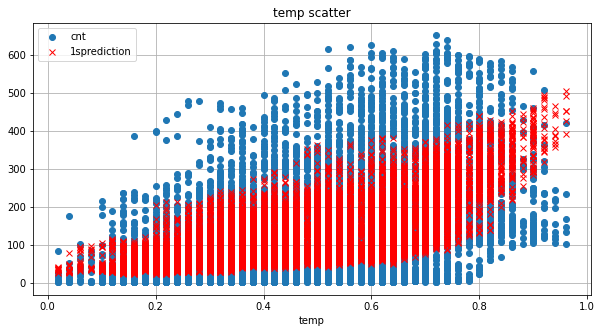

In [32]:
# Interpreting the coefficients beta

df.plot(x = 'temp', y = ['cnt','1sprediction'], figsize = (10,5), grid =True, style = ['o','rx'])
plt.title('temp scatter')
plt.show()

## Some things about our prediction.

The blue is the true value, the red our prediction. 

1. Our prediction does not go to the extreme value.
2. The prediction capturas an upward trend when the temperature increasess. Let's plot this.


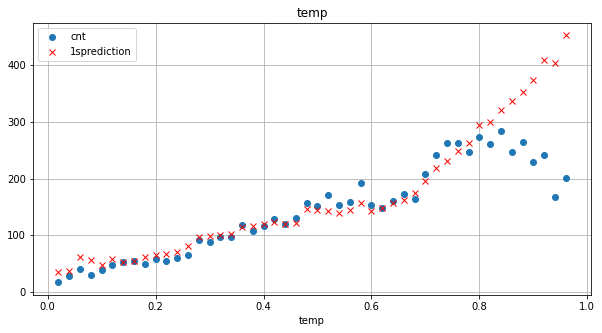

In [33]:
bikes_agg = df[['1sprediction','cnt','temp']].groupby('temp').mean().reset_index()
bikes_agg.plot(x = 'temp', y = ['cnt','1sprediction'], figsize = (10,5), grid=True, style  = ['o','rx'])
plt.title('temp')
plt.show()

## Conclusions about this scatterplot

1. The mean of our predictions is very close to the mean of the real values. On average, the prediction is good.
2. The prediction captures the upward trend.
3. The prediction captures the trend because $\beta_{temp} > 0$, then when temp increase, the prediction increase.
4. This is not exactly exponential, we are reducing the model to $\exp(const + \beta_{temp}x_{temp})$ but this    
   constant depends on the other variables, and this variables change for each $x_temp$, therefore we don't get 
   a smooth exponential

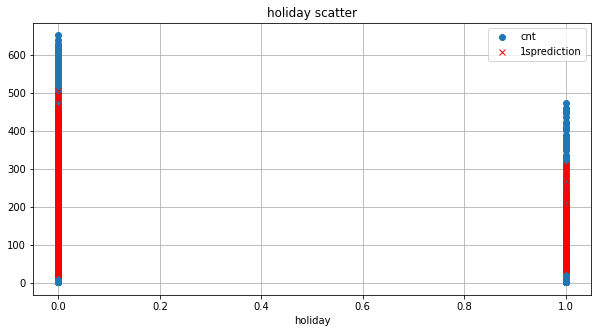

In [34]:
# Interpreting beta_holiday = -0.1220

df.plot(x = 'holiday', y = ['cnt','1sprediction'], figsize = (10,5), grid =True, style = ['o','rx'])
plt.title('holiday scatter')
plt.show()


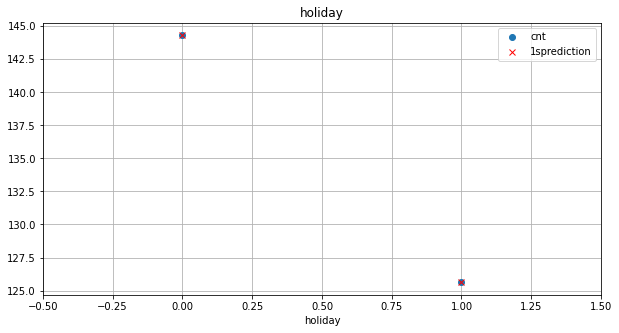

In [35]:
bikes_agg = df[['1sprediction','cnt','holiday']].groupby('holiday').mean().reset_index()
bikes_agg.plot(x = 'holiday', y = ['cnt','1sprediction'], figsize = (10,5), grid=True, style  = ['o','rx'])
plt.xlim(-0.5,1.5)
plt.title('holiday')
plt.show()

## Some conclusions $\beta_{holiday}$.

1. beta is negative, then when holiday increase, then the prediction decrease (cnt predicted)

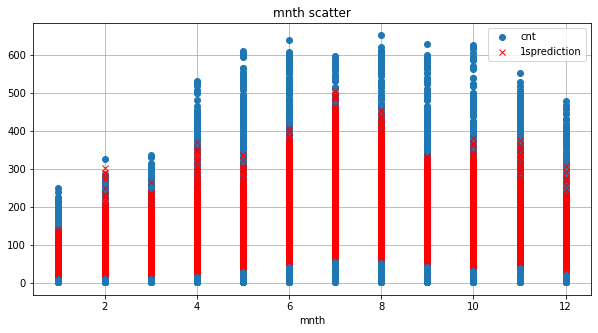

In [36]:
# Interpreting beta_mnth = 0.0573

df.plot(x = 'mnth', y = ['cnt','1sprediction'], figsize = (10,5), grid =True, style = ['o','rx'])
plt.title('mnth scatter')
plt.show()

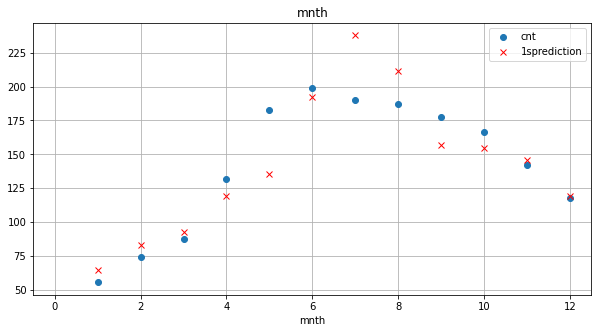

In [37]:
bikes_agg = df[['1sprediction','cnt','mnth']].groupby('mnth').mean().reset_index()
bikes_agg.plot(x = 'mnth', y = ['cnt','1sprediction'], figsize = (10,5), grid=True, style  = ['o','rx'])
plt.xlim(-0.5,12.5)
plt.title('mnth')
plt.show()

## Interpreting $\beta_{mnth} = 0.0573$.

1. This is a very small coefficient, of we increase mnth a little the result will be very similar.
2. The down trend is caused by the variables others than mnth.

# Some final ideas: Introducing feature engineering

If we want to capture the trend in the right-hand side of the figure below this box, we need to do some feature engineering. The real data is blue, our function is monotonic, then if temp goes up, the prediction will go up.
For that reason we don't fit this 'U' appearing in the picture.

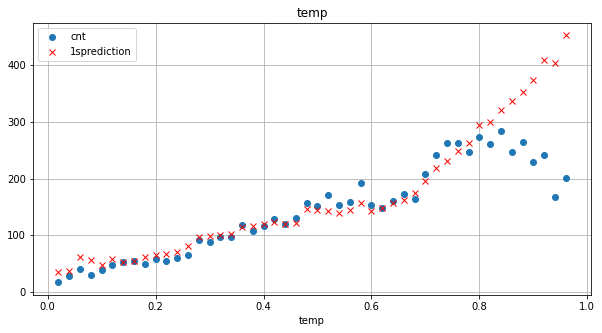

In [38]:
bikes_agg = df[['1sprediction','cnt','temp']].groupby('temp').mean().reset_index()
bikes_agg.plot(x = 'temp', y = ['cnt','1sprediction'], figsize = (10,5), grid=True, style  = ['o','rx'])
plt.title('temp')
plt.show()

# Featuring engineering

## Polynomial transformation

The easiest way for introducing non-linearity is using a polynomial transformation. In this case we will use a square transformation.

The idea here: we use a transformation to adjust on part of the data set, to the real trend.

In [39]:
df['tempsquare'] = np.power(df['temp'],6)



In [40]:
df



,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1sprediction,tempsquare
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,29.842909,0.000191
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,30.698314,0.000113
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.202506,0.000113
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,36.602817,0.000191
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,38.396324,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92,170.537190,0.005489
8641,1,12,365,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71,178.893370,0.005489
8642,1,12,365,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52,173.455091,0.004096
8643,1,12,365,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38,166.700128,0.003011


In [41]:
X = df[['mnth','day','hr','holiday','weekday','workingday','weathersit','atemp','hum','windspeed','tempsquare']]
y = df['cnt']

In [42]:
X = sm.add_constant(X)
bike_model2 = sm.GLM(y,X, family = sm.families.Poisson()).fit()
print(bike_model2.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8633
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3125e+05
Date:                Sat, 24 Oct 2020   Deviance:                   6.0947e+05
Time:                        12:55:25   Pearson chi2:                 6.80e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4097      0.007    517.548      0.0

In [43]:
secondpredict = bike_model2.predict(X)
df['secondpredict'] = secondpredict



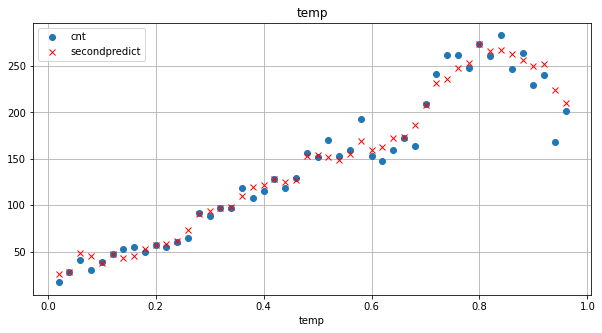

In [44]:
bikes_agg = df[['secondpredict', 'cnt', 'temp']].groupby('temp').mean().reset_index()
bikes_agg.plot(x = 'temp', y= ['cnt','secondpredict'], figsize = (10,5), grid = True, style = ['o','rx'])
plt.title('temp')
plt.show()


## Quantifying these modifications.

For instance we can calculate the mean square error among two different powers.

# Implementing One Hot encoding.

There is an issue here, we are modeling weekdays as float.  Our encode of weekdays was 1,2,3,4,5. Rather than modeling as a continuous variable, we want to treat each day differently. 

Recall that One Hot Encoding creates different 'dummy variables' for each category in our variable. In our particular case Monday, Tuesday, Wednesday, Thursday, Friday. 



In [48]:
# One hot enconding 

df['weekdaystr'] = df['weekday'].astype(str) # Here we create a variable encoding weekdays as str
np.unique(df['weekdaystr']) 

one_hot = pd.get_dummies(df['weekdaystr'])

In [50]:
one_hot # these is the one_hot encoding for weekdays

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
8640,0,0,0,0,0,0,1
8641,0,0,0,0,0,0,1
8642,0,0,0,0,0,0,1
8643,0,0,0,0,0,0,1


In [51]:
df = df.drop('weekdaystr', axis = 1)
df = df.join(one_hot)
df

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,1sprediction,tempsquare,secondpredict,0,1,2,3,4,5,6
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,29.842909,0.000191,27.222349,0,0,0,0,0,0,1
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,30.698314,0.000113,27.632682,0,0,0,0,0,0,1
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,32.202506,0.000113,28.962407,0,0,0,0,0,0,1
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,36.602817,0.000191,33.727372,0,0,0,0,0,0,1
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,38.396324,0.000191,35.350382,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,...,170.537190,0.005489,241.459335,0,0,0,0,0,0,1
8641,1,12,365,20,0,6,0,1,0.42,0.4242,...,178.893370,0.005489,253.078708,0,0,0,0,0,0,1
8642,1,12,365,21,0,6,0,1,0.40,0.4091,...,173.455091,0.004096,240.428663,0,0,0,0,0,0,1
8643,1,12,365,22,0,6,0,1,0.38,0.3939,...,166.700128,0.003011,226.491557,0,0,0,0,0,0,1


In [53]:
# We modify our model to add this new feature

X = df[['mnth','day','hr','holiday','weekday','workingday','weathersit','atemp','hum','windspeed','tempsquare','0','1','2','3','4','5','6']]
y = df['cnt']
X = sm.add_constant(X)
bike_model3 = sm.GLM(y,X, family = sm.families.Poisson()).fit()
print(bike_model3.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8629
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3100e+05
Date:                Sat, 24 Oct 2020   Deviance:                   6.0895e+05
Time:                        13:07:08   Pearson chi2:                 6.80e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1066      0.004    515.266      0.0

In [54]:
predict3rd = bike_model2.predict(X)
df['predict3rd'] = predict3rd

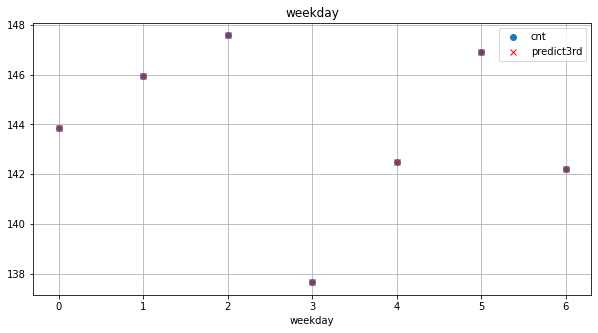

In [56]:
# Comparing predictions

bikes_agg = df[['predict3rd', 'cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x = 'weekday', y= ['cnt','predict3rd'], figsize = (10,5), grid = True, style = ['o','rx'])
plt.title('weekday')
plt.show()

# The prediction is the same

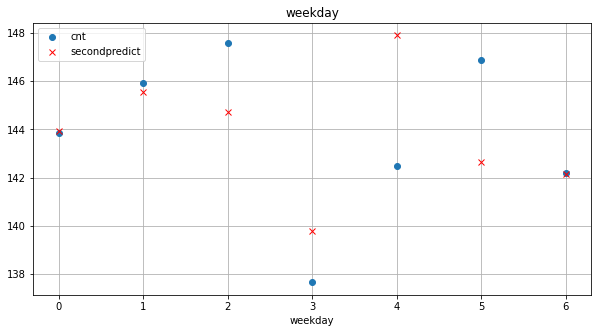

In [58]:
# Comparing with the 2nd prediction model - before dummy variables

bikes_agg = df[['secondpredict', 'cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x = 'weekday', y= ['cnt','secondpredict'], figsize = (10,5), grid = True, style = ['o','rx'])
plt.title('weekday')
plt.show()

# Our new model is much better

# Implement model: cross validation

General idea: we want to divide our data set into pieces, and then use some pieces for training and some other for validation. When we train we permute the role of each piece. That is if we have 3 pieces we denote 1,2,3 each of these pieces and we assign to each position a role, for instance, for the vector (1,2,3), __positions__ 1 and 2 are used for training and 3 for validation. If we permute this array we get different configurations.

In [60]:
# permutations of a data set - shuffle 

import numpy as np
from sklearn.utils import shuffle

bikes_shuffle = shuffle(df)
bikes_shuffle

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,secondpredict,0,1,2,3,4,5,6,predict3rd
1996,2,3,88,1,0,2,1,1,0.24,0.2121,...,0.000191,47.683833,0,0,1,0,0,0,0,48.612568
6742,4,10,286,12,0,4,1,2,0.62,0.5606,...,0.056800,130.470358,0,0,0,0,1,0,0,125.579298
3644,2,6,156,18,0,0,0,1,0.70,0.6515,...,0.117649,261.205595,1,0,0,0,0,0,0,260.859494
6397,4,9,272,3,0,4,1,2,0.60,0.5152,...,0.046656,70.431200,0,0,0,0,1,0,0,67.898325
6332,4,9,269,10,0,1,1,2,0.64,0.5758,...,0.068719,120.074535,0,1,0,0,0,0,0,120.557156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,3,7,185,13,1,1,0,2,0.78,0.7121,...,0.225200,206.880422,0,1,0,0,0,0,0,206.704611
37,1,1,2,14,0,0,0,3,0.36,0.3485,...,0.002177,68.430773,1,0,0,0,0,0,0,68.542049
5936,3,9,252,21,0,5,1,1,0.66,0.5909,...,0.082654,198.836201,0,0,0,0,0,1,0,204.385498
2029,2,3,89,10,0,3,1,2,0.34,0.3182,...,0.001545,80.788508,0,0,0,1,0,0,0,79.607261


In [62]:
df.head(5)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,secondpredict,0,1,2,3,4,5,6,predict3rd
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,0.000191,27.222349,0,0,0,0,0,0,1,27.171039
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,0.000113,27.632682,0,0,0,0,0,0,1,27.579169
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,0.000113,28.962407,0,0,0,0,0,0,1,28.906142
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,0.000191,33.727372,0,0,0,0,0,0,1,33.663372
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,0.000191,35.350382,0,0,0,0,0,0,1,35.283087


In [65]:
bikes_shuffle.head(5)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,secondpredict,0,1,2,3,4,5,6,predict3rd
1996,2,3,88,1,0,2,1,1,0.24,0.2121,...,0.000191,47.683833,0,0,1,0,0,0,0,48.612568
6742,4,10,286,12,0,4,1,2,0.62,0.5606,...,0.056800,130.470358,0,0,0,0,1,0,0,125.579298
3644,2,6,156,18,0,0,0,1,0.70,0.6515,...,0.117649,261.205595,1,0,0,0,0,0,0,260.859494
6397,4,9,272,3,0,4,1,2,0.60,0.5152,...,0.046656,70.431200,0,0,0,0,1,0,0,67.898325
6332,4,9,269,10,0,1,1,2,0.64,0.5758,...,0.068719,120.074535,0,1,0,0,0,0,0,120.557156


In [66]:
y_shuffle = bikes_shuffle['cnt']
X_shuffle = bikes_shuffle[['season','mnth','day','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum',
                           'windspeed','tempsquare','0','1','2','3','4','5','6']]

In [73]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5) # splitting into 5 subsets

In [74]:
for train, test in kf.split(X_shuffle): # these are the subsets
    print("%s %s" %(train,test))

[1729 1730 1731 ... 8642 8643 8644] [   0    1    2 ... 1726 1727 1728]
[   0    1    2 ... 8642 8643 8644] [1729 1730 1731 ... 3455 3456 3457]
[   0    1    2 ... 8642 8643 8644] [3458 3459 3460 ... 5184 5185 5186]
[   0    1    2 ... 8642 8643 8644] [5187 5188 5189 ... 6913 6914 6915]
[   0    1    2 ... 6913 6914 6915] [6916 6917 6918 ... 8642 8643 8644]


In [75]:
y_pred_cv = np.empty((0,1)) # empty array shape (0,1)

for train, test in kf.split(X_shuffle):
    bike_modelcv = sm.GLM(y_shuffle.iloc[train], X_shuffle.iloc[train], family = sm.families.Poisson()).fit()
    y_pred_cv = np.append(y_pred_cv, bike_modelcv.predict(X_shuffle.iloc[test]))

In [77]:
bikes_shuffle['y_pred_cv'] = y_pred_cv

<ipython-input-77-78457073004d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_shuffle['y_pred_cv'] = y_pred_cv


In [79]:
bikes_shuffle

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,secondpredict,0,1,2,3,4,5,6,predict3rd,y_pred_cv
1996,2,3,88,1,0,2,1,1,0.24,0.2121,...,47.683833,0,0,1,0,0,0,0,48.612568,52.471075
6742,4,10,286,12,0,4,1,2,0.62,0.5606,...,130.470358,0,0,0,0,1,0,0,125.579298,141.096586
3644,2,6,156,18,0,0,0,1,0.70,0.6515,...,261.205595,1,0,0,0,0,0,0,260.859494,255.232046
6397,4,9,272,3,0,4,1,2,0.60,0.5152,...,70.431200,0,0,0,0,1,0,0,67.898325,80.482583
6332,4,9,269,10,0,1,1,2,0.64,0.5758,...,120.074535,0,1,0,0,0,0,0,120.557156,136.296801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,3,7,185,13,1,1,0,2,0.78,0.7121,...,206.880422,0,1,0,0,0,0,0,206.704611,217.805819
37,1,1,2,14,0,0,0,3,0.36,0.3485,...,68.430773,1,0,0,0,0,0,0,68.542049,70.844313
5936,3,9,252,21,0,5,1,1,0.66,0.5909,...,198.836201,0,0,0,0,0,1,0,204.385498,215.820515
2029,2,3,89,10,0,3,1,2,0.34,0.3182,...,80.788508,0,0,0,1,0,0,0,79.607261,84.584402


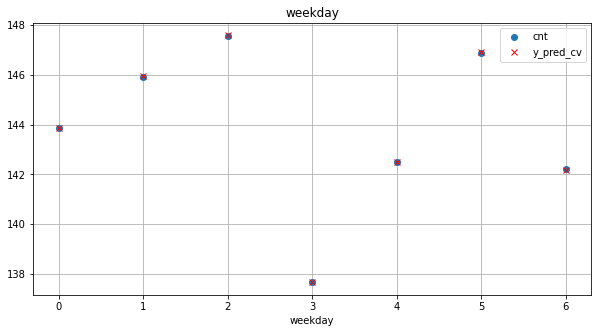

In [81]:
# Comparing cross-validations with the actual value

bikes_agg = bikes_shuffle[['y_pred_cv', 'cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x = 'weekday', y= ['cnt','y_pred_cv'], figsize = (10,5), grid = True, style = ['o','rx'])
plt.title('weekday')
plt.show()

In [83]:
# Comparing log-likelihood functions

loglikelihood_cv=np.dot(y_shuffle, np.log(bikes_shuffle["y_pred_cv"]))-np.dot(y_shuffle, np.log(y_shuffle))+np.sum(y_shuffle)-np.sum(bikes_shuffle["y_pred_cv"])
loglikelihood_cv

-303167.5072375564

In [88]:
loglikelihood_insample=np.dot(y, np.log(df["predict3rd"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(df["predict3rd"])
loglikelihood_insample

# These are the loglikelihood functions (Poisson distribution) after approximating 
# the factorial using Stirling's formula.

# Computers cannot handle the factorial, for that reason we have to use some 
# alternatives


-304476.25413506245